<a href="https://colab.research.google.com/github/CormacOShea/CormacOSheaNYC_Crime_Project/blob/main/NYC_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#About dataset
#This dataset includes all the crimes reported in NYC from 2006 to 2016
#The goal of this dataset is to see the crime activity in NYC over the years
#Can we use machine learning to predict the locations(longitude and latitude)
#of future crimes reported

In [ ]:
#Column meanings of the original dataset
#CMPLNT_NUM - Randomly generated persistent ID for each complaint
#CMPLNT_FR_DT - The Exact date of ocurrence for the reported event
#CMPLNT_FR_TM - Exact time of occurence for the reported event.
#CMPLNT_TO_DT - Ending date of occurence for the reported event, if exact time is unknown
#CMPLNT_TO_TM - Ending time of occurence for the reported event, if exact date is unknown
#ADDR_PCT_CD - The property in which the incident occured 
#RPT_DT - Date event was reported to the police
#KY_CD - Three digit offencse classification code
#OFNS_DESC - Description of offense corresponding with key code
#PD_CD - Three digit internal classification code
#PD_DESC - Description of interanl classificaton corresponding with PD code
#CRM_ATPT_CPTD_CD - Indicator of whether crime was successfully completed or attempted, but failed 
#LAW_CAT_CD - Level of offense: felony, misdemeanoor, violation
#BORO_NM - The name of the borough in which the incident occurred.
#LOC_OF_OCCUR_DESC - Specific location of occurrence, in or around premises, front or back
#PREM_TYP_DESC - Specific description of priemises; grocery store, street, etc.
#JURIS_DESC - Description of the jurisdication code
#JURISDICTION_CODE - Jurisdiction responsible for the incident. Either interanl, like police(0),
#Transit(1), and Housing(2); or exteranl(3) like Correction, Port Authority, etc.
#PARKS_NM - Name of NYC park of occurence
#HADEVELOPT - Name of NYCHA housing development of occurence, if applicable
#HOUSING_PSA - Development Level Code
#X_COORD_CD - X-coordinate for New York State Plane Coordinate System
#Y_COORD_CD - Y-coordinate for New York State Plane Coordinate System
#SUSP_AGE_GROUP - Suspect's Age Group
#SUSP_RACE - Suspect's Race Description
#SUSP_SEX - Suspect's Sex Description
#TRANSIT_DISTRICT - Transit district in which the offense occurred
#Latitude - Midblock Latitude coordinate for Global Coordiante System
#Longitude - Midblock Longtitude coordinate for Global Coordiante System
#Lat_Lon - Geospatial Location Point (latitude and longitude combined)



In [2]:
#Input data files
import pandas as pd
import numpy as np

df = pd.read_csv("NYPD_Complaint_Data_Historic.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#After viewing the head i have noticed some NaN values, i need to examine the 
#missing values first. The isna() function will do this.
df.head()


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [ ]:
#Check the size of the dataset
#There is 1048575 observations
#24 variables
df.shape

(1048575, 24)

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',inplace=True)

In [ ]:
missing_value_df

,column_name,percent_missing
CMPLNT_NUM,CMPLNT_NUM,0.000000
BORO_NM,BORO_NM,0.000000
JURIS_DESC,JURIS_DESC,0.000000
KY_CD,KY_CD,0.000000
RPT_DT,RPT_DT,0.000000
LAW_CAT_CD,LAW_CAT_CD,0.000000
CMPLNT_FR_TM,CMPLNT_FR_TM,0.000000
ADDR_PCT_CD,ADDR_PCT_CD,0.000095
CRM_ATPT_CPTD_CD,CRM_ATPT_CPTD_CD,0.000095
CMPLNT_FR_DT,CMPLNT_FR_DT,0.006199


In [ ]:
#As we can see below there is quite a bit of data missing from some columns
#I will drop "Parks_NM" and "HADEVELOPT" columns as almost all the data 
# in these columns are null. I will further inspect the two columns with 19%
#of data missing
percent_missing

In [3]:
df.drop(['PARKS_NM','HADEVELOPT'],axis=1,inplace=True)

In [114]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,Month,Year,CMPLNT_FR_TM,Time,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,date2
0,101109527,12/31/2015,12,2015,23:45:00,23,12/31/2015,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44,INSIDE,BAR/NIGHT CLUB,UNKNOWN,UNKNOWN,1.00731e+06,241257,40.8288,-73.9167,"(40.828848333, -73.916661142)",2015-12-31
1,153401121,12/31/2015,12,2015,23:36:00,23,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,UNKNOWN,UNKNOWN,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103,OUTSIDE,False,UNKNOWN,UNKNOWN,1.04399e+06,193406,40.6973,-73.7846,"(40.697338138, -73.784556739)",2015-12-31
2,569369778,12/31/2015,12,2015,23:30:00,23,12/31/2015,117,DANGEROUS DRUGS,503,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28,UNKNOWN,OTHER,UNKNOWN,UNKNOWN,999463,231690,40.8026,-73.9451,"(40.802606608, -73.945051911)",2015-12-31
3,968417082,12/31/2015,12,2015,23:30:00,23,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105,INSIDE,RESIDENCE-HOUSE,UNKNOWN,UNKNOWN,1.06018e+06,177862,40.6545,-73.7263,"(40.654549444, -73.726338791)",2015-12-31
4,641637920,12/31/2015,12,2015,23:25:00,23,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13,FRONT OF,OTHER,UNKNOWN,UNKNOWN,987606,208148,40.738,-73.9879,"(40.7380024, -73.98789129)",2015-12-31


In [4]:
#Here i have filled all the nan values with "UNKNOWN" to explain to the user that the values are unknown.
df.fillna('UNKNOWN', inplace=True)

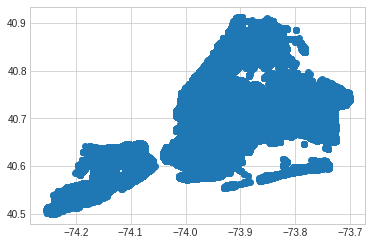

In [ ]:
#Exploratory Analysis using charts and stuff.
#Scatter plot to show where the reported crimes are by longitude and latitude
#The problem here is that there is overplotting, it's difficult to see how 
#densely-packed the data points are when many of them are in small are.

#Get the color for each borough so it looks better!!!!
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()


In [ ]:
df['RPT_DT']

0          23:45:00
1          23:36:00
2          23:30:00
3          23:30:00
4          23:25:00
             ...   
1048570    20:30:00
1048571    20:28:00
1048572    20:25:00
1048573    20:25:00
1048574    20:25:00
Name: CMPLNT_FR_TM, Length: 1048575, dtype: object

In [ ]:
#Dividing up the times into sections of the day to see
#what time of the day crime is most reported
#After farther analysis, there is not much point in doing this.
df['Time of Day'] = (df['CMPLNT_FR_TM'].dt.hour % 24 + 4) // 4
df['Time of Day'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

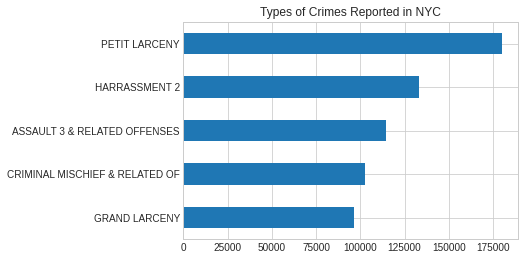

In [ ]:
#Top 5 types of crimes reported in NYC
df.OFNS_DESC.value_counts().iloc[:5].sort_values().plot(kind="barh", title = "Types of Crimes Reported in NYC")

In [ ]:
df.info()

In [ ]:
(df['PREM_TYP_DESC'] == 'BAR/NIGHT CLUB').sum()

12484

In [5]:
#When trying to convert the column to a datetime object i get the error
#'Out of bounds nanosecond timestamp', after doing some research
#there are errors with the dates in the column like the year '1015' is in there
#that should be 2015
df['date2'] = pd.to_datetime(df['RPT_DT'], errors ='coerce')

In [ ]:
#Here it is shown
#I will have to workaround this error 
df[df['date2'].isna()]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,date2
27341,211843983,12/04/1015,16:45:00,NaN,NaN,12/10/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,18.0,INSIDE,STREET,991707.0,216641.0,40.761311,-73.973083,"(40.761311039, -73.973083376)",NaT
27342,131106711,12/04/1015,12:30:00,12/10/2015,12:40:00,12/10/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,108.0,NaN,STREET,1010228.0,211854.0,40.748137,-73.906245,"(40.748136928, -73.906245306)",NaT
39052,821425869,11/25/1015,14:30:00,12/1/2015,14:40:00,12/1/2015,109,GRAND LARCENY,405.0,"LARCENY,GRAND BY THEFT OF CREDIT CARD",COMPLETED,FELONY,N.Y. POLICE DEPT,BROOKLYN,94.0,INSIDE,GYM/FITNESS FACILITY,994636.0,200707.0,40.717573,-73.962535,"(40.717573206, -73.962534952)",NaT
48548,161924074,09/26/1015,12:11:00,11/23/2015,13:00:00,11/23/2015,109,GRAND LARCENY,415.0,"LARCENY,GRAND FROM PERSON,PICK",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,25.0,NaN,STREET,1001575.0,232339.0,40.804384,-73.937422,"(40.804384046, -73.937421669)",NaT


In [ ]:
#Parameter - errors = 'coerce' will convert all dates which are OK
#and the rest will be NAT
date_format = pd.to_datetime(df['RPT_DT'], errors = 'coerce')

In [ ]:
#Date 2 is now the new 'CMPLNT_TO_DT'(Date the complaint was reported)
df['date2'].sum

<bound method Series.sum of 0         2015-12-31
1         2015-12-31
2         2015-12-31
3         2015-12-31
4         2015-12-31
             ...    
1048570   2013-11-01
1048571   2013-11-01
1048572   2013-11-01
1048573   2013-11-01
1048574   2013-11-01
Name: date2, Length: 1048575, dtype: datetime64[ns]>

In [6]:
#Created new column 'month'
df.insert(2,'Month',0)

In [7]:
#Now i will extract the month value from the date2 column 
#to see what the most popular month for reporting crimes
df['Month'] = pd.DatetimeIndex(df['date2']).month

In [8]:
#Created new column 'Year'
df.insert(3,'Year',0)

In [9]:
#Now i will extract the year value from the date2 column 
#to see what the most popular year for reporting crimes
df['Year'] = pd.DatetimeIndex(df['date2']).year

In [ ]:
df.head()

In [ ]:
#Check the current index of the data
df['date2'].index

RangeIndex(start=0, stop=1048575, step=1)

In [ ]:
#Slice indexes via .loc Method
#Select range, 500 reported crimes in this date range
date_range = df['date2'].loc['2010-01-01':'2015-12-31']

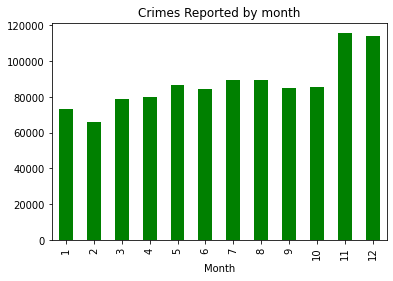

In [10]:
#As the year goes on crime tends to increase, December and November being the 
#most, maybe because of the holiday season.
#Unable to get rid of the '.0' at the end of the month value.
df.groupby('Month').size().plot(kind = 'bar',
          title ='Crimes Reported by month', color = 'green')

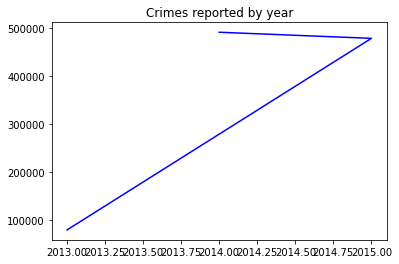

In [11]:
#As you can see by this, most of the values are from 2013 onwards, alot
#of the values were entered incorrectly in, so they are "NAT" now from
#converting them to a datetime object earlier, this has kind of skewed
#the dataset.

df['Year'].value_counts().plot(kind = 'line',
                               title = 'Crimes reported by year', color = 'blue')

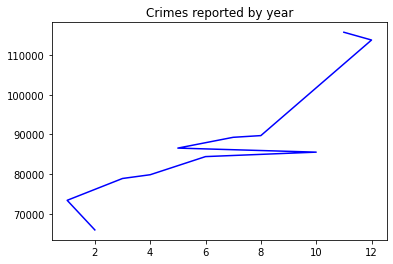

In [12]:
#Generally an upwards trajectory of crimes reported as the year goes on
#Why is this? must look at factors that cause this
df['Month'].value_counts().plot(kind = 'line',
                               title = 'Crimes reported by year', color = 'blue')

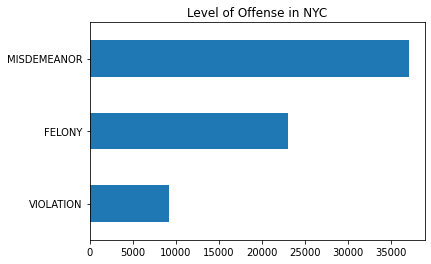

In [ ]:
#See if the level of crime gets worse as the year goes on 
df.LAW_CAT_CD.value_counts().iloc[:5].sort_values().plot(kind="barh", title = "Level of Offense in NYC")

In [ ]:
#Occured another problem, says there is nan value relationg to bar/nightclub
(df.PREM_TYP_DESC == 'STREET').sum()

20432

In [13]:
#see the time of the day where the street crimes happen
df.insert(6,'Hour',0)

In [ ]:
df.head()

In [14]:
#Extracting the hour from the 'CMPLNT_FR_TM' column and putting it in the Time
#column.
df['Hour'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S').dt.hour

In [15]:
#Drop two more columns as they are no longer needed, almost 20 percent unknown 
#value in each of them.
df.drop(['CMPLNT_TO_DT','CMPLNT_TO_TM'],axis=1,inplace=True)

In [ ]:
df.head()

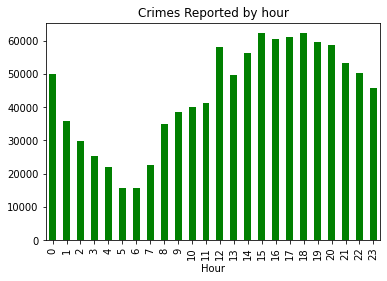

In [17]:
#surprisingly most of the crime reported is in the afternoon and evening
df.groupby('Hour').size().plot(kind = 'bar',
          title ='Crimes Reported by hour', color = 'green')

In [117]:
df.PREM_TYP_DESC.str.contains("STREET")

0          False
1            NaN
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573     True
1048574    False
Name: PREM_TYP_DESC, Length: 1048575, dtype: object

In [ ]:
df.head()

In [19]:
#Set all na values to false as i couldn't create a variable from column
#as i was getting errors to do with na values.
#df.PREM_TYP_DESC.str.contains("STREET",nan=False)
street_crime = df[df['PREM_TYP_DESC'].str.contains("STREET") == True]

In [23]:
(df.Month =='11','12')

(0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 1048570    False
 1048571    False
 1048572    False
 1048573    False
 1048574    False
 Name: Month, Length: 1048575, dtype: bool, '12')

In [ ]:
#ax =df.plot.bar(x=df['Month'], y=street_crime, rot=0)